# Jamie's Phase 1 Project Work!
### hooray 

### also side note... highly recommend using command+F to navigate this sucker

In [2]:
# imports
import pandas as pd

### CPI package sourced from https://github.com/datadesk/cpi#:~:text=Working%20with%20Python,the%20Bureau%20of%20Labor%20Statistics

In [4]:
import cpi
cpi.update() # run to make sure current Consumer Price Index is being used in calculations

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
bomMovieGross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [8]:
imdbNameBasics = pd.read_csv('zippedData/imdb.name.basics.csv.gz')

imdbTitleAkas = pd.read_csv('zippedData/imdb.title.akas.csv.gz')

imdbTitleBasics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')

imdbTitleCrew = pd.read_csv('zippedData/imdb.title.crew.csv.gz')

imdbTitlePrincipals = pd.read_csv('zippedData/imdb.title.principals.csv.gz')

imdbTitleRatings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')

In [9]:
rtMovieInfo = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding='windows-1252')

rtReviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding='windows-1252')

tmdbMovies = pd.read_csv('zippedData/tmdb.movies.csv.gz')

tnMovieBudgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [106]:
# kaggle_movies = pd.read_csv('movies_metadata.csv', dtype={'genres':list}) == not working

In [35]:
# Kaggle columns
import ast
# kaggle_movies['genres'] = kaggle_movies['genres'].apply(lambda x: ast.literal_eval(x))
# kaggle_movies['genres']



In [10]:
# get list of all columns in files
allFiles = [bomMovieGross, imdbNameBasics, imdbTitleBasics, imdbTitleAkas, imdbTitleCrew, imdbTitlePrincipals, imdbTitleRatings,
           rtMovieInfo, rtReviews, tmdbMovies, tnMovieBudgets]

allCols = list(map(lambda x: x.columns, allFiles))
allCols

[Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object'),
 Index(['nconst', 'primary_name', 'birth_year', 'death_year',
        'primary_profession', 'known_for_titles'],
       dtype='object'),
 Index(['tconst', 'primary_title', 'original_title', 'start_year',
        'runtime_minutes', 'genres'],
       dtype='object'),
 Index(['title_id', 'ordering', 'title', 'region', 'language', 'types',
        'attributes', 'is_original_title'],
       dtype='object'),
 Index(['tconst', 'directors', 'writers'], dtype='object'),
 Index(['tconst', 'ordering', 'nconst', 'category', 'job', 'characters'], dtype='object'),
 Index(['tconst', 'averagerating', 'numvotes'], dtype='object'),
 Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
        'date'],
       dtype='object'),
 Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
        'date'],
       dtype='object'),
 Index(['Unnamed: 0', 'genre_ids', 'id', 'origin

# Cleaning tnMovieBudgets

In [11]:
tnMovieBudgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [12]:
# looking for more efficient way to do this
tnMovieBudgets['worldwide_gross'] = tnMovieBudgets['worldwide_gross'].apply(lambda x: int(x.replace('$','').replace(',','')))
tnMovieBudgets['domestic_gross'] = tnMovieBudgets['domestic_gross'].apply(lambda x: int(x.replace('$','').replace(',','')))
tnMovieBudgets['production_budget'] = tnMovieBudgets['production_budget'].apply(lambda x: int(x.replace('$','').replace(',','')))
# tnMovieBudgets[tnMovieBudgets['worldwide_gross']=='$0'] = 'None'
# try applymap

# don't have to run again, but why??

In [13]:
# convert "release_date" to date-time format

tnMovieBudgets['release_date'] = pd.to_datetime(tnMovieBudgets['release_date'], errors='coerce') # what does coerce do?
tnMovieBudgets['release_date']

0      2009-12-18
1      2011-05-20
2      2019-06-07
3      2015-05-01
4      2017-12-15
          ...    
5777   2018-12-31
5778   1999-04-02
5779   2005-07-13
5780   2015-09-29
5781   2005-08-05
Name: release_date, Length: 5782, dtype: datetime64[ns]

In [14]:
# adding 'month_released' and year released column
tnMovieBudgets['month_released'] = tnMovieBudgets['release_date'].apply(lambda x: str(x))
tnMovieBudgets['month_released'] = tnMovieBudgets['month_released'].apply(lambda x: int(x[5:7]))

tnMovieBudgets['year'] = tnMovieBudgets['release_date'].apply(lambda x: str(x))
tnMovieBudgets['year'] = tnMovieBudgets['year'].apply(lambda x: int(x[:4]))

#oopsie gotta drop some stuff
tnMovieBudgets.drop(labels='release_date', axis=1, inplace=True)

In [15]:
tnMovieBudgets.head()

,id,movie,production_budget,domestic_gross,worldwide_gross,month_released,year
0,1,Avatar,425000000,760507625,2776345279,12,2009
1,2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,5,2011
2,3,Dark Phoenix,350000000,42762350,149762350,6,2019
3,4,Avengers: Age of Ultron,330600000,459005868,1403013963,5,2015
4,5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,12,2017


# Cleaning bomMovieGross

In [16]:
bomMovieGross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [17]:
bomMovieGross['foreign_gross'].fillna(value=0, inplace=True)

In [18]:
bomMovieGross['foreign_gross'] = bomMovieGross['foreign_gross'].apply(lambda x: float(str(x).replace(',','')))


# Adjusting all money values for inflation using CPI package


In [19]:
# bomMovieGross

bomMovieGross['domestic_adj'] = bomMovieGross.apply(lambda x: cpi.inflate(x.domestic_gross, x.year), axis=1)

bomMovieGross['foreign_adj'] = bomMovieGross.apply(lambda x: cpi.inflate(x.foreign_gross, x.year), axis=1)

In [20]:
bomMovieGross.rename(mapper={'title' : 'primary_title'}, axis=1, inplace=True)

In [21]:
bomMovieGross.head()

,primary_title,studio,domestic_gross,foreign_gross,year,domestic_adj,foreign_adj
0,Toy Story 3,BV,415000000.0,652000000.0,2010,4.925641e+08,7.738598e+08
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,3.966625e+08,8.205050e+08
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,3.513229e+08,7.884587e+08
3,Inception,WB,292600000.0,535700000.0,2010,3.472874e+08,6.358231e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,2.833134e+08,6.099487e+08


In [22]:
bomMovieGross['year'].dtype

dtype('int64')

In [23]:
# found that no CPI exists after 2018
cpi.get(2018)

251.107

In [24]:
# tnMovieBudgets
tnMovieYA = tnMovieBudgets[tnMovieBudgets['year']<2019]

tnMovieBudgets['domestic_adj'] = tnMovieYA.apply(lambda x: cpi.inflate(x.domestic_gross, x.year), axis=1)

tnMovieBudgets['worldwide_adj'] = tnMovieYA.apply(lambda x: cpi.inflate(x.worldwide_gross, x.year), axis=1)

tnMovieBudgets['budget_adj'] = tnMovieYA.apply(lambda x: cpi.inflate(x.production_budget, x.year), axis=1)


In [25]:
tnMovieBudgets.head()

,id,movie,production_budget,domestic_gross,worldwide_gross,month_released,year,domestic_adj,worldwide_adj,budget_adj
0,1,Avatar,425000000,760507625,2776345279,12,2009,9.174536e+08,3.349300e+09,5.127072e+08
1,2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,5,2011,2.773640e+08,1.203123e+09,4.724294e+08
2,3,Dark Phoenix,350000000,42762350,149762350,6,2019,NaN,NaN,NaN
3,4,Avengers: Age of Ultron,330600000,459005868,1403013963,5,2015,5.012120e+08,1.532023e+09,3.609991e+08
4,5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,12,2017,6.548212e+08,1.390266e+09,3.347058e+08


In [26]:
# Fill domestic/worldwide adjusted NaNs with original price-- the CPI adjuster does not adjust
# for any years after 2018.

tnMovieBudgets['domestic_adj'].fillna(value=tnMovieBudgets['domestic_gross'], inplace=True)


In [27]:
tnMovieBudgets['worldwide_adj'].fillna(value=tnMovieBudgets['worldwide_gross'], inplace=True)

In [28]:
tnMovieBudgets['budget_adj'].fillna(value=tnMovieBudgets['production_budget'], inplace=True)

# Cleaning tmdbMovies

In [29]:
tmdbMovies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [30]:
tmdbMovies.drop('Unnamed: 0', axis=1, inplace=True)
# don't run again

In [31]:
tmdbMovies.drop('original_title', axis=1, inplace=True)

In [32]:
tmdbMovies.drop('original_language', axis=1, inplace=True)

In [33]:
#CHECK IF THERE ARE DUPLICATE MOVIES DUDE
tmdbMovies['id'].value_counts()

292086    3
463839    3
11976     3
391872    3
416572    3
         ..
356987    1
350846    1
479871    1
500353    1
524288    1
Name: id, Length: 25497, dtype: int64

In [34]:
tmdbMovies.columns

Index(['genre_ids', 'id', 'popularity', 'release_date', 'title',
       'vote_average', 'vote_count'],
      dtype='object')

In [35]:
# rename title column to match imdb data
tmdbMovies.rename(mapper={'title' : 'primary_title'}, axis=1, inplace=True)

# Cleaning IMDB Data

In [36]:
imdbNameBasics, imdbTitleBasics, imdbTitleAkas, imdbTitleCrew, imdbTitlePrincipals, imdbTitleRatings,

(           nconst         primary_name  birth_year  death_year  \
 0       nm0061671    Mary Ellen Bauder         NaN         NaN   
 1       nm0061865         Joseph Bauer         NaN         NaN   
 2       nm0062070           Bruce Baum         NaN         NaN   
 3       nm0062195         Axel Baumann         NaN         NaN   
 4       nm0062798          Pete Baxter         NaN         NaN   
 ...           ...                  ...         ...         ...   
 606643  nm9990381         Susan Grobes         NaN         NaN   
 606644  nm9990690          Joo Yeon So         NaN         NaN   
 606645  nm9991320       Madeline Smith         NaN         NaN   
 606646  nm9991786  Michelle Modigliani         NaN         NaN   
 606647  nm9993380       Pegasus Envoyé         NaN         NaN   
 
                                       primary_profession  \
 0              miscellaneous,production_manager,producer   
 1             composer,music_department,sound_department   
 2         

In [37]:
imdbNameBasics.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [38]:
imdbTitleBasics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [39]:
imdbTitleBasics['primary_title'].value_counts()

Home                               24
Broken                             20
The Return                         20
Alone                              16
Homecoming                         16
                                   ..
Girl's Play                         1
MAMIL: Middle Aged Men in Lycra     1
Das Hotelzimmer                     1
Fear Valley                         1
Dow South Player University         1
Name: primary_title, Length: 136071, dtype: int64

In [40]:
# may use to create list of all possible titles when joining certain dataframes...
imdbTitleBasics['title_equal'] = (imdbTitleBasics['original_title'] == imdbTitleBasics['primary_title'])

imdbTitleBasics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_equal
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",True
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",False
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,True
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",True
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",False


In [41]:
imdbTitleBasics['title_equal'].value_counts()

True     131640
False     14504
Name: title_equal, dtype: int64

In [42]:
imdbTitleAkas.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [43]:
# rename title_id to tconst to allow for appending
imdbTitleAkas.rename(mapper={'title_id' : 'tconst'}, axis=1, inplace=True)

#already ran

In [44]:
imdbTitleAkas.head()

,tconst,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [45]:
imdbTitleAkas['region'].value_counts()

US     51490
XWW    18467
RU     13817
DE     11634
FR     10990
       ...  
WF         1
SB         1
XNA        1
NC         1
MQ         1
Name: region, Length: 213, dtype: int64

In [46]:
imdbTitleCrew.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [47]:
imdbTitlePrincipals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [48]:
imdbTitleRatings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


Time to smush these Data frames together along the **tconst** column:

In [49]:
imdb_dfs = [imdbTitleBasics, imdbTitleAkas, imdbTitleCrew, imdbTitlePrincipals, imdbTitleRatings]

In [50]:
len(imdb_dfs)

5

In [51]:
# maybe clean this up later with a for loop?
imdb_master = pd.merge(
                    pd.merge(
                            pd.merge(
                                    pd.merge(
                                        imdb_dfs[0], imdb_dfs[1], on='tconst', how = 'outer'
                                        ), 
                                imdb_dfs[2], on='tconst', how = 'outer'
                                ), 
                        imdb_dfs[3], on='tconst', how = 'outer', suffixes=('_akas', '_princ')
                        ),
                  imdb_dfs[4], on='tconst', how = 'outer')

In [52]:
len(imdb_master)

2975785

In [53]:
# remove any movies with start year after 2021
imdb_master = imdb_master.loc[imdb_master['start_year'] <= 2021]

### Merging in tmdbMovies by 'primary_title'

In [54]:
imdb_master = pd.merge(imdb_master, tmdbMovies, on='primary_title', how = 'outer')

In [55]:
imdb_master.drop_duplicates(subset=['tconst'], inplace=True)
# already ran

In [56]:
imdb_master.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_equal,ordering_akas,title,region,...,job,characters,averagerating,numvotes,genre_ids,id,popularity,release_date,vote_average,vote_count
0,tt0063540,Sunghursh,Sunghursh,2013.0,175.0,"Action,Crime,Drama",True,1.0,Sangharsh,IN,...,NaN,NaN,7.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN
50,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019.0,114.0,"Biography,Drama",False,1.0,One Day Before the Rainy Season,XWW,...,NaN,NaN,7.2,43.0,NaN,NaN,NaN,NaN,NaN,NaN
78,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018.0,122.0,Drama,True,10.0,La otra cara del viento,VE,...,NaN,NaN,6.9,4517.0,"[35, 18]",299782.0,9.8,2018-11-02,7.0,64.0
208,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018.0,NaN,"Comedy,Drama",True,1.0,Subse Bada Sukh,IN,...,NaN,"[""Lalloo""]",6.1,13.0,NaN,NaN,NaN,NaN,NaN,NaN
238,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017.0,80.0,"Comedy,Drama,Fantasy",False,1.0,La Telenovela Errante,NaN,...,NaN,NaN,6.5,119.0,NaN,NaN,NaN,NaN,NaN,NaN


**Making IMDB_master with BOM GROSS**

In [57]:
imdb_BOM = pd.merge(imdb_master, bomMovieGross, on='primary_title', how='outer')
imdb_BOM.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_equal,ordering_akas,title,region,...,popularity,release_date,vote_average,vote_count,studio,domestic_gross,foreign_gross,year,domestic_adj,foreign_adj
0,tt0063540,Sunghursh,Sunghursh,2013.0,175.0,"Action,Crime,Drama",True,1.0,Sangharsh,IN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019.0,114.0,"Biography,Drama",False,1.0,One Day Before the Rainy Season,XWW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018.0,122.0,Drama,True,10.0,La otra cara del viento,VE,...,9.8,2018-11-02,7.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018.0,NaN,"Comedy,Drama",True,1.0,Subse Bada Sukh,IN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017.0,80.0,"Comedy,Drama,Fantasy",False,1.0,La Telenovela Errante,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
len(imdb_master)

146102

In [779]:
imdb_master_money['domestic_adj'].value_counts()

0.000000e+00    538
1.879433e+08     24
1.806371e+04     24
6.669849e+05     20
6.957263e+05     13
               ... 
4.926336e+07      1
8.075486e+07      1
2.071730e+07      1
5.782173e+07      1
1.605698e+04      1
Name: domestic_adj, Length: 2061, dtype: int64

In [776]:
len(imdb_BOM)

146885

In [60]:
imdb_BOM.fillna(value='Unknown', inplace=True)

In [61]:
imdb_BOM['domestic_adj'][imdb_BOM['domestic_adj']!='Unknown'].value_counts().values.sum()

4112

In [62]:
# contains the most values
imdb_BOM['foreign_adj'][imdb_BOM['foreign_adj']!='Unknown'].value_counts().values.sum()

4147

In [63]:
len(imdb_BOM[(imdb_BOM['foreign_adj']!='Unknown')&(imdb_BOM['genres']!='Unknown')])

3326

In [64]:
# Clean up genres column 
imdb_BOM['genres'] = imdb_BOM['genres'].apply(
    lambda x: x.split(',') if (',' in x) else ([x] if (x != 'Unknown') else x)
    )

In [65]:
imdb_BOM['genres'].head()

0      [Action, Crime, Drama]
1          [Biography, Drama]
2                     [Drama]
3             [Comedy, Drama]
4    [Comedy, Drama, Fantasy]
Name: genres, dtype: object

In [82]:
# Merge Movie Budgets onto imdb_BOM
imdb_BOM_tn = pd.merge(imdb_BOM, tnMoviesAdj, on='primary_title')

In [83]:
imdb_BOM_tn.fillna(value='Unknown', inplace=True)

In [84]:
len(imdb_BOM_tn['primary_title'])

3896

In [85]:
imdb_BOM_tn.replace(
    to_replace=imdb_BOM_tn['popularity'][imdb_BOM_tn['popularity']!='Unknown'],
    value=0.0,
    inplace=True
    )

In [86]:
imdb_BOM_tn['popularity'].apply(lambda x: float(x) if x !='Unknown' else x)

0         4.705
1       Unknown
2         6.576
3         6.576
4         8.919
         ...   
3891    Unknown
3892    Unknown
3893    Unknown
3894    Unknown
3895    Unknown
Name: popularity, Length: 3896, dtype: object

In [87]:
# for the future - finding a way to consolidate all the lengths 
# for different levels of the data frame

imdb_BOM_tn['popularity'][imdb_BOM_tn['popularity']!='Unknown'].describe(include='all')

count     2992.0
unique    1603.0
top          0.6
freq       289.0
Name: popularity, dtype: float64

In [88]:
imdb_BOM_tn['popularity'][imdb_BOM_tn['popularity']!='Unknown'].count()

2992

In [89]:
imdb_master_money['popularity'][imdb_master_money['popularity']!='Unknown'].count()

2992

In [90]:
# exploring range of popularity column
imdb_BOM_tn['popularity'][imdb_BOM_tn['popularity']!='Unknown'].min()

0.6

In [91]:
imdb_BOM_tn['popularity'][imdb_BOM_tn['popularity']!='Unknown'].max()

80.773

In [92]:
genres = []
for movie in imdb_BOM_tn['genres']:
    if type(movie)==list:
        for genre in movie:
            if genre not in genres:
                genres.append(genre)
                
genres

['Action',
 'Animation',
 'Comedy',
 'Adventure',
 'Fantasy',
 'Mystery',
 'Drama',
 'Romance',
 'Documentary',
 'Crime',
 'Sci-Fi',
 'Family',
 'Thriller',
 'Horror',
 'Biography',
 'History',
 'News',
 'War',
 'Sport',
 'Music',
 'Musical',
 'Western',
 'Reality-TV']

In [93]:
# find the top 10 genres with BOM_tn
# make genre dictionary
genre_dict_2 = {}

# a function to determine whether or not a movie's genre column contains a given genre-- add docstring later
def genre_contained(genre, df):
    index_list = []
    truth_teller = 'None'
    ctr = 0
    for row in df['genres']:
        if type(row) == list:
            for i in row:
                #print(row)
                if i == genre:
                    truth_teller = True
                    index_list.append(ctr) # should i add continue here
                    #print(truth_teller)
                else:
                    truth_teller = False
                    #print(truth_teller)
        ctr += 1
    return index_list

In [94]:
for genre in genres:
    genre_dict_2[genre] = imdb_BOM_tn.iloc[genre_contained(genre, imdb_BOM_tn)]

In [95]:
# top 15 genres by their frequency in the DataFrame (how many movies classified with this descriptor)
top_15_genres = {i:len(genre_dict_2[i]) for i in genres}
sorted_top_15_genres = sorted(top_15_genres.items(), key=lambda kv: kv[1], reverse=True)[:15]
sorted_top_15_genres

[('Drama', 1817),
 ('Comedy', 842),
 ('Action', 710),
 ('Thriller', 594),
 ('Documentary', 499),
 ('Adventure', 490),
 ('Horror', 415),
 ('Crime', 398),
 ('Romance', 372),
 ('Mystery', 249),
 ('Biography', 248),
 ('Sci-Fi', 229),
 ('Family', 204),
 ('Fantasy', 202),
 ('Animation', 148)]

In [96]:
# split above tuple list into lists
top_genre_ct_names = [name[0] for name in sorted_top_15_genres]
top_genre_cts = [name[1] for name in sorted_top_15_genres]

In [97]:
# measuring top genres by popularity column

top_genres_popularity = {i:genre_dict[i]['popularity'][genre_dict[i]['popularity']!='Unknown'].mean() for i in genres}
sorted_top_genres_popularity = sorted(top_genres_popularity.items(), key=lambda kv: kv[1], reverse=True)
sorted_top_genres_popularity

[('Adventure', 15.849670644391395),
 ('Sci-Fi', 14.345203124999998),
 ('Fantasy', 14.015947674418602),
 ('Action', 13.435757024793395),
 ('Animation', 13.135606299212599),
 ('Musical', 10.57488),
 ('Crime', 10.242686956521734),
 ('Comedy', 9.783019774011308),
 ('Mystery', 9.461259999999992),
 ('News', 9.405199999999999),
 ('Biography', 9.351870813397127),
 ('Family', 9.19519230769231),
 ('Western', 8.6081),
 ('Thriller', 8.605823170731703),
 ('History', 8.564258823529412),
 ('Music', 8.364701492537312),
 ('Romance', 8.276813504823155),
 ('Drama', 8.089868055555574),
 ('Horror', 7.978852691218126),
 ('Sport', 6.140416666666668),
 ('War', 5.647642857142857),
 ('Documentary', 5.6210893371757935),
 ('Reality-TV', 0.6)]

In [98]:
most_popular_names = [name[0] for name in sorted_top_genres_popularity][:15]
most_popular_avgs = [avg[1] for avg in sorted_top_genres_popularity][:15]

# note for later - you can use the df.str.contains() to search for series with certain strings

### Grouping IMDB master

In [503]:
# By movie title
def get_perc(grp_obj): # saw this on stack overflow, don't understand it
    gr_size = grp_obj.size()
    return gr_size / gr_size.sum()

grouped_titles = imdb_master.groupby(by=['tconst', 'title']).mean()
grouped_titles.head()

,,start_year,runtime_minutes,ordering_akas,is_original_title,ordering_princ,averagerating,numvotes,id,popularity,vote_average,vote_count
tconst,title,,,,,,,,,,,
tt0063540,Sangharsh,2013.0,175.0,1.0,0.0,10.0,7.0,77.0,NaN,NaN,NaN,NaN
tt0066787,One Day Before the Rainy Season,2019.0,114.0,1.0,0.0,1.0,7.2,43.0,NaN,NaN,NaN,NaN
tt0069049,La otra cara del viento,2018.0,122.0,10.0,0.0,10.0,6.9,4517.0,299782.0,9.8,7.0,64.0
tt0069204,Subse Bada Sukh,2018.0,NaN,1.0,0.0,10.0,6.1,13.0,NaN,NaN,NaN,NaN
tt0100275,La Telenovela Errante,2017.0,80.0,1.0,1.0,10.0,6.5,119.0,NaN,NaN,NaN,NaN


In [504]:
# By year
grouped_years = imdb_master.groupby(by=['start_year', 'primary_title']).mean()
grouped_years.head()

runtime_minutes  ordering_akas  \
start_year primary_title                                                      
2010.0     !Women Art Revolution                        83.0            1.0   
           #unibrennt                                   85.0            1.0   
           '70 Remembering a Revolution                114.0            1.0   
           'Master Harold' ... And the Boys             87.0            1.0   
           (No) Laughing Matter                         55.0            1.0   

                                             is_original_title  \
start_year primary_title                                         
2010.0     !Women Art Revolution                           0.0   
           #unibrennt                                      0.0   
           '70 Remembering a Revolution                    0.0   
           'Master Harold' ... And the Boys                1.0   
           (No) Laughing Matter                            0.0   

                                             ordering_princ  averagerating  \
start_year primary_title                                                     
2010.0     !Women Art Revolution                        1.0            6.9   
           #unibrennt                                   1.0            NaN   
           '70 Remembering a Revolution                10.0            NaN   
           'Master Harold' ... And the Boys            10.0            5.8   
           (No) Laughing Matter                        10.0            7.7   

                                             numvotes  id  popularity  \
start_year primary_title                                                
2010.0     !Women Art Revolution                196.0 NaN         NaN   
           #unibrennt                             NaN NaN         NaN   
           '70 Remembering a Revolution           NaN NaN         NaN   
           'Master Harold' ... And the Boys     442.0 NaN         NaN   
           (No) Laughing Matter                  10.0 NaN         NaN   

                                             vote_average  vote_count  
start_year primary_title                                               
2010.0     !Women Art Revolution                      NaN         NaN  
           #unibrennt                                 NaN         NaN  
           '70 Remembering a Revolution               NaN         NaN  
           'Master Harold' ... And the Boys           NaN         NaN  
           (No) Laughing Matter                       NaN         NaN

In [505]:
# By director
grouped_directors = imdb_master.groupby(by=['directors', 'primary_title']).mean()
grouped_directors.head()

start_year  runtime_minutes  \
directors primary_title                                             
nm0000080 The Other Side of the Wind      2018.0            122.0   
nm0000095 A Rainy Day in New York         2019.0             95.0   
          Blue Jasmine                    2013.0             98.0   
          Café Society                    2016.0             96.0   
          Irrational Man                  2015.0             95.0   

                                      ordering_akas  is_original_title  \
directors primary_title                                                  
nm0000080 The Other Side of the Wind           10.0                0.0   
nm0000095 A Rainy Day in New York               1.0                0.0   
          Blue Jasmine                         10.0                0.0   
          Café Society                         10.0                0.0   
          Irrational Man                       10.0                0.0   

                                      ordering_princ  averagerating  numvotes  \
directors primary_title                                                         
nm0000080 The Other Side of the Wind            10.0            6.9    4517.0   
nm0000095 A Rainy Day in New York                1.0            NaN       NaN   
          Blue Jasmine                          10.0            7.3  179453.0   
          Café Society                          10.0            6.6   62466.0   
          Irrational Man                        10.0            6.6   50303.0   

                                            id  popularity  vote_average  \
directors primary_title                                                    
nm0000080 The Other Side of the Wind  299782.0       9.800           7.0   
nm0000095 A Rainy Day in New York          NaN         NaN           NaN   
          Blue Jasmine                160588.0      10.443           7.0   
          Café Society                339397.0       8.248           6.4   
          Irrational Man              282984.0       9.000           6.4   

                                      vote_count  
directors primary_title                           
nm0000080 The Other Side of the Wind        64.0  
nm0000095 A Rainy Day in New York            NaN  
          Blue Jasmine                    1983.0  
          Café Society                    1506.0  
          Irrational Man                  1112.0

In [506]:
# By region
grouped_regions = imdb_master.groupby(by=['region', 'primary_title']).mean()
grouped_regions.head()

start_year  runtime_minutes  \
region primary_title                                                         
AD     73'                                         2016.0              NaN   
       Impacto                                     2017.0              NaN   
AE     4th G - The Ground Level                    2015.0              NaN   
       A Tale of Shadows                           2017.0            107.0   
       A Tale of Water, Palm Trees and Family      2015.0            162.0   

                                               ordering_akas  \
region primary_title                                           
AD     73'                                               1.0   
       Impacto                                           1.0   
AE     4th G - The Ground Level                          1.0   
       A Tale of Shadows                                 1.0   
       A Tale of Water, Palm Trees and Family            1.0   

                                               is_original_title  \
region primary_title                                               
AD     73'                                                   0.0   
       Impacto                                               0.0   
AE     4th G - The Ground Level                              0.0   
       A Tale of Shadows                                     0.0   
       A Tale of Water, Palm Trees and Family                0.0   

                                               ordering_princ  averagerating  \
region primary_title                                                           
AD     73'                                               10.0            NaN   
       Impacto                                            1.0            7.9   
AE     4th G - The Ground Level                          10.0            NaN   
       A Tale of Shadows                                 10.0            6.1   
       A Tale of Water, Palm Trees and Family             1.0            NaN   

                                               numvotes  id  popularity  \
region primary_title                                                      
AD     73'                                          NaN NaN         NaN   
       Impacto                                     36.0 NaN         NaN   
AE     4th G - The Ground Level                     NaN NaN         NaN   
       A Tale of Shadows                          132.0 NaN         NaN   
       A Tale of Water, Palm Trees and Family       NaN NaN         NaN   

                                               vote_average  vote_count  
region primary_title                                                     
AD     73'                                              NaN         NaN  
       Impacto                                          NaN         NaN  
AE     4th G - The Ground Level                         NaN         NaN  
       A Tale of Shadows                                NaN         NaN  
       A Tale of Water, Palm Trees and Family           NaN         NaN

In [507]:
# by actor
actors = imdb_master[(imdb_master['category']=='actor') | (imdb_master['category']=='actress')]
grouped_actors = actors.groupby(by=['nconst', 'primary_title']).mean()
grouped_actors.head()

,,start_year,runtime_minutes,ordering_akas,is_original_title,ordering_princ,averagerating,numvotes,id,popularity,vote_average,vote_count
nconst,primary_title,,,,,,,,,,,
nm0000093,By the Sea,2015.0,122.0,10.0,0.0,1.0,5.3,16206.0,314385.0,6.471,5.4,306.0
nm0000096,The Artist's Garden: American Impressionism,2017.0,90.0,1.0,0.0,1.0,6.8,9.0,NaN,NaN,NaN,NaN
nm0000101,"Flip, Flop, and Fly, 40 Years of the Downchild Blues Band",2010.0,NaN,1.0,0.0,1.0,7.5,13.0,NaN,NaN,NaN,NaN
nm0000102,The Big Green,2014.0,32.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
nm0000110,Branagh Theatre Live: The Entertainer,2016.0,NaN,1.0,0.0,1.0,7.1,57.0,NaN,NaN,NaN,NaN


In [508]:
imdb_master['start_year'].value_counts()

2017.0    17504
2016.0    17272
2018.0    16849
2015.0    16243
2014.0    15589
2013.0    14709
2012.0    13787
2011.0    12900
2010.0    11849
2019.0     8379
2020.0      937
2021.0       83
Name: start_year, dtype: int64

## Creating imdb_master_money (with tnMovieBudgets)

In [67]:
tnMovieBudgets.columns

Index(['id', 'movie', 'production_budget', 'domestic_gross', 'worldwide_gross',
       'month_released', 'year', 'domestic_adj', 'worldwide_adj',
       'budget_adj'],
      dtype='object')

In [68]:
tnMovieBudgets.rename(mapper={'movie' : 'primary_title'}, axis=1, inplace=True)

In [69]:
tnMoviesAdj = tnMovieBudgets[['primary_title', 'month_released', 'year', 'domestic_adj', 'worldwide_adj', 'budget_adj']]

In [70]:
imdb_master_money = pd.merge(imdb_master, tnMoviesAdj, on='primary_title')

In [71]:
# checking for NaNs
imdb_master_money['worldwide_adj'].isna().value_counts()

False    3816
Name: worldwide_adj, dtype: int64

In [72]:
# fill NaN values with 'Unknown'
imdb_master_money.fillna(value='Unknown', inplace=True)

In [73]:
imdb_master_money[(imdb_master_money['budget_adj']!='Unknown')&(imdb_master_money['genres']!='Unknown')]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_equal,ordering_akas,title,region,...,id,popularity,release_date,vote_average,vote_count,month_released,year,domestic_adj,worldwide_adj,budget_adj
0,tt0249516,Foodfight!,Foodfight!,2012,91,"Action,Animation,Comedy",True,10,Foodfight!,FI,...,116977,4.705,2013-05-07,2.1,46,12,2012,0.000000e+00,8.308546e+04,5.072648e+07
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,Unknown,"Action,Adventure,Fantasy",True,1,Mortal Kombat,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,8,1995,1.196122e+08,2.074109e+08,3.396470e+07
3,tt3844362,The Overnight,The Overnight,2015,79,"Comedy,Mystery",True,10,Éjjeli találkozó,HU,...,308024,6.576,2015-06-19,6,200,6,2015,1.211856e+06,1.273211e+06,2.183902e+05
4,tt0337692,On the Road,On the Road,2012,124,"Adventure,Drama,Romance",True,10,En el camino,AR,...,83770,8.919,2012-12-21,5.6,518,3,2013,8.008268e+05,1.034691e+07,2.777455e+07
5,tt2404548,On the Road,On the Road,2011,90,Drama,True,1,On the Road,AM,...,83770,8.919,2012-12-21,5.6,518,3,2013,8.008268e+05,1.034691e+07,2.777455e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,tt9678962,Fuel,Fuel,2018,Unknown,"Documentary,Sport",True,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,11,2008,2.094681e+05,2.094681e+05,3.005195e+06
3811,tt9729206,Diner,Diner,2019,Unknown,Crime,True,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,4,1982,3.377392e+07,3.377392e+07,1.340990e+07
3812,tt9805168,Traitor,Traitor,2015,110,"Action,Drama,Romance",True,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,8,2008,2.828589e+07,3.351661e+07,2.644572e+07
3813,tt9844102,Ray,Ray,2018,111,Crime,True,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,10,2004,1.031764e+08,1.710195e+08,5.480381e+07


### Let's talk about genre ( grouping movies by genre )

In [74]:
# need to convert genres to list
imdb_master_money['genres'][4]

'Adventure,Drama,Romance'

In [75]:
imdb_master_money['genres'] = imdb_master_money['genres'].apply(
    lambda x: x.split(',') if (',' in x) else ([x] if (x != 'Unknown') else x)
    )


In [76]:
imdb_master_money['genres']

0        [Action, Animation, Comedy]
1       [Action, Adventure, Fantasy]
2                            Unknown
3                  [Comedy, Mystery]
4        [Adventure, Drama, Romance]
                    ...             
3811                         [Crime]
3812        [Action, Drama, Romance]
3813                         [Crime]
3814                   [Documentary]
3815                         Unknown
Name: genres, Length: 3816, dtype: object

In [77]:
# let's find all the different genres
genres = []
for movie in imdb_master_money['genres']:
    if type(movie)==list:
        for genre in movie:
            if genre not in genres:
                genres.append(genre)
                
genres

['Action',
 'Animation',
 'Comedy',
 'Adventure',
 'Fantasy',
 'Mystery',
 'Drama',
 'Romance',
 'Documentary',
 'Crime',
 'Sci-Fi',
 'Family',
 'Thriller',
 'Horror',
 'Biography',
 'History',
 'News',
 'War',
 'Sport',
 'Music',
 'Musical',
 'Western',
 'Reality-TV']

In [78]:
len(genres)

23

In [79]:
# create a dictionary pairing each genre with the DataFrame of movies that are classified as that genre
# genres[k]:'none' for k in range(0, len(genres)) just in case
genre_dict = {}

# a function to determine whether or not a movie's genre column contains a given genre-- add docstring later
def genre_contained(genre, df):
    index_list = []
    truth_teller = 'None'
    ctr = 0
    for row in df['genres']:
        if type(row) == list:
            for i in row:
                #print(row)
                if i == genre:
                    truth_teller = True
                    index_list.append(ctr) # should i add continue here
                    #print(truth_teller)
                else:
                    truth_teller = False
                    #print(truth_teller)
        ctr += 1
    return index_list
                  
# genre_contained(genres[0], imdb_master_money) --> a test

In [80]:
for genre in genres:
    genre_dict[genre] = imdb_master_money.iloc[genre_contained(genre, imdb_master_money)]

In [81]:
# making sure there are no holes before making graph
genre_dict['Adventure']['month_released'].value_counts()

12    64
6     55
11    52
3     49
7     48
5     46
2     37
8     36
4     30
9     26
10    24
1     23
Name: month_released, dtype: int64

# Graphs

In [ ]:
# SOME HELPFUL FUNCS:

In [602]:
dicty = {'1':'a', '2':'b', '3':'c'}
dicty = list(dicty.keys())

'1'

In [692]:
# for determining if prime number - returns original or modified number
def un_prime(amount):
    if amount > 7:
        for i in range(2,amount):
            if (amount % i) == 0:
                return amount
            else:
                amount = amount+1
                if (amount % i) == 0:
                    return amount
    else:    
        print("Error: amount must be larger than 7")

In [698]:
un_prime(11)

In [687]:
# for calculation differences between factors
def diff_calc(amount):
    factor2 = []
    factor1 = []
    factor_diffs = []
    for i in range(1, amount + 1):
        if amount % i == 0:
            factor1.append(i)
            factor2.append(amount // i)

    for i in range(0, len(factor1)):
        factor_diffs.append(abs(factor2[i] - factor1[i]))

    return {'min_diff': min(factor_diffs), 'amount': amount, 'factor1': factor1, 'factor2':factor2, 'factor_diffs':factor_diffs, 'under_5': (min(factor_diffs) < 5)}



In [707]:
diff_calc(un_prime(22))

{'min_diff': 9,
 'amount': 22,
 'factor1': [1, 2, 11, 22],
 'factor2': [22, 11, 2, 1],
 'factor_diffs': [21, 9, 9, 21],
 'under_5': False}

In [708]:
# for keeping min difference under 5 - changes amount until min-differences < 5
def diff_under_5(info_dict):
    while info_dict['under_5'] == False:
        print("we're starting with", info_dict['amount'])
        print('another iteration')
        info_dict['amount'] = info_dict['amount'] + 1
        print(info_dict['amount'])
        info_dict = diff_calc(info_dict['amount'])
    return info_dict
            
            
            

In [742]:
test_dict = diff_under_5(diff_calc(un_prime(23)))
test_dict

{'min_diff': 2,
 'amount': 24,
 'factor1': [1, 2, 3, 4, 6, 8, 12, 24],
 'factor2': [24, 12, 8, 6, 4, 3, 2, 1],
 'factor_diffs': [23, 10, 5, 2, 2, 5, 10, 23],
 'under_5': True}

In [743]:
# for determining the shape of subplot matrix: returns shape as [rows, cols]
def nRowCol(info_dict):
    shape = []
    
    for i in range(0, len(info_dict['factor_diffs'])):
        if info_dict['factor_diffs'][i] == info_dict['min_diff']:
            if info_dict['factor1'][i] >= info_dict['factor2'][i]:
                if (info_dict['factor1'][i] / info_dict['factor2'][i]) > 5:
                    info_dict['row'] = info_dict['factor2'][i]
                    info_dict['column'] = info_dict['factor1'][i]
                    return [info_dict['row'], info_dict['column']]
                else:
                    info_dict['row'] = info_dict['factor1'][i]
                    info_dict['column'] = info_dict['factor2'][i]
                    return [info_dict['row'], info_dict['column']]
            else:
                if (info_dict['factor1'][i] / info_dict['factor2'][i]) > 5:
                    info_dict['row'] = info_dict['factor2'][i]
                    info_dict['column'] = info_dict['factor1'][i]
                    return [info_dict['row'], info_dict['column']]
                else:
                    info_dict['row'] = info_dict['factor1'][i]
                    info_dict['column'] = info_dict['factor2'][i]
                    return [info_dict['row'], info_dict['column']]

**Graphing most popular genres**

<ipython-input-878-265b893ad46b>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(top_genre_ct_names, rotation = 45)
<ipython-input-878-265b893ad46b>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(most_popular_names, rotation = 45)


Text(0.5, 1.0, 'Most popular Genres by imdb popularity rating')

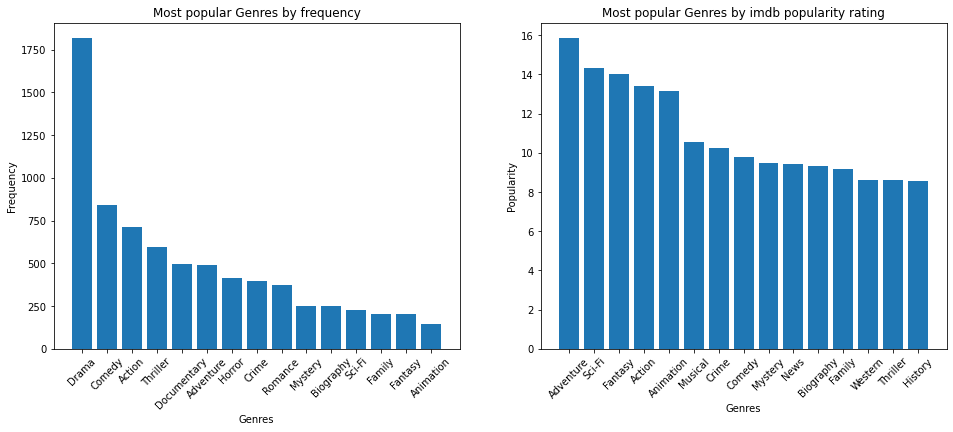

In [878]:
popular_genres, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
###############

ax1.bar(top_genre_ct_names, top_genre_cts)
ax2.bar(most_popular_names, most_popular_avgs)
# x and y vals; use bottom parameter to make stacked
ax2.set_xlabel('Genres')
ax2.set_ylabel('Popularity')
ax1.set_xlabel('Genres')
ax1.set_ylabel('Frequency')

ax1.set_xticklabels(top_genre_ct_names, rotation = 45)
ax2.set_xticklabels(most_popular_names, rotation = 45)

ax1.set_title('Most popular Genres by frequency')
ax2.set_title('Most popular Genres by imdb popularity rating')

In [764]:
figgy = nRowCol(test_dict)
figgy

[4, 6]

In [ ]:
fig, ax = plt.subplots(nrows=figgy[0], ncols=figgy[1], figsize=(18,14))
###############
years = [genre_dict['Adventure'][genre_dict['Adventure']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

frequency = [genre_dict['Adventure'][genre_dict['Adventure']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax[0][0].bar(months, mean_dom_grosses)   
ad2 = ax[0][0].bar(months, mean_ww_grosses, bottom=mean_dom_grosses) # use bottom parameter to make stacked
ax[0][0].set_title('Adventure')
ax[0][0].set_xlabel('Month')
ax[0][0].set_ylabel('Average Total Gross (Billions)')

In [881]:
genre_dict['Adventure']['start_year'].value_counts()

2016.0    61
2014.0    61
2015.0    55
2013.0    53
2018.0    49
2017.0    47
2011.0    47
2012.0    44
2010.0    41
2019.0    26
2020.0     5
2021.0     1
Name: start_year, dtype: int64

In [753]:
genre_dict['Adventure'][genre_dict['Adventure']['star'.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_equal,ordering_akas,title,region,...,id,popularity,release_date,vote_average,vote_count,month_released,year,domestic_adj,worldwide_adj,budget_adj
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,Unknown,"[Action, Adventure, Fantasy]",True,1,Mortal Kombat,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,8,1995,1.160517e+08,2.012369e+08,3.295367e+07
4,tt0337692,On the Road,On the Road,2012,124,"[Adventure, Drama, Romance]",True,10,En el camino,AR,...,83770,8.919,2012-12-21,5.6,518,3,2013,7.769887e+05,1.003891e+07,2.694778e+07
10,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114,"[Adventure, Comedy, Drama]",True,10,Walter Mitty a jeho tajny zivot,CZ,...,116745,10.743,2013-12-25,7.1,4859,12,2013,6.277415e+07,2.024977e+08,9.808994e+07
12,tt0369610,Jurassic World,Jurassic World,2015,124,"[Action, Adventure, Sci-Fi]",True,10,Джурасик свят,BG,...,135397,20.709,2015-06-12,6.6,14056,6,2015,6.910463e+08,1.746875e+09,2.277812e+08
17,tt0398286,Tangled,Tangled,2010,100,"[Adventure, Animation, Comedy]",True,10,Raiponce,FR,...,38757,21.511,2010-11-24,7.5,6407,11,2010,2.312607e+08,6.753703e+08,2.994085e+08


Text(0.5, 1.0, 'Total Gross per Month per Genre')

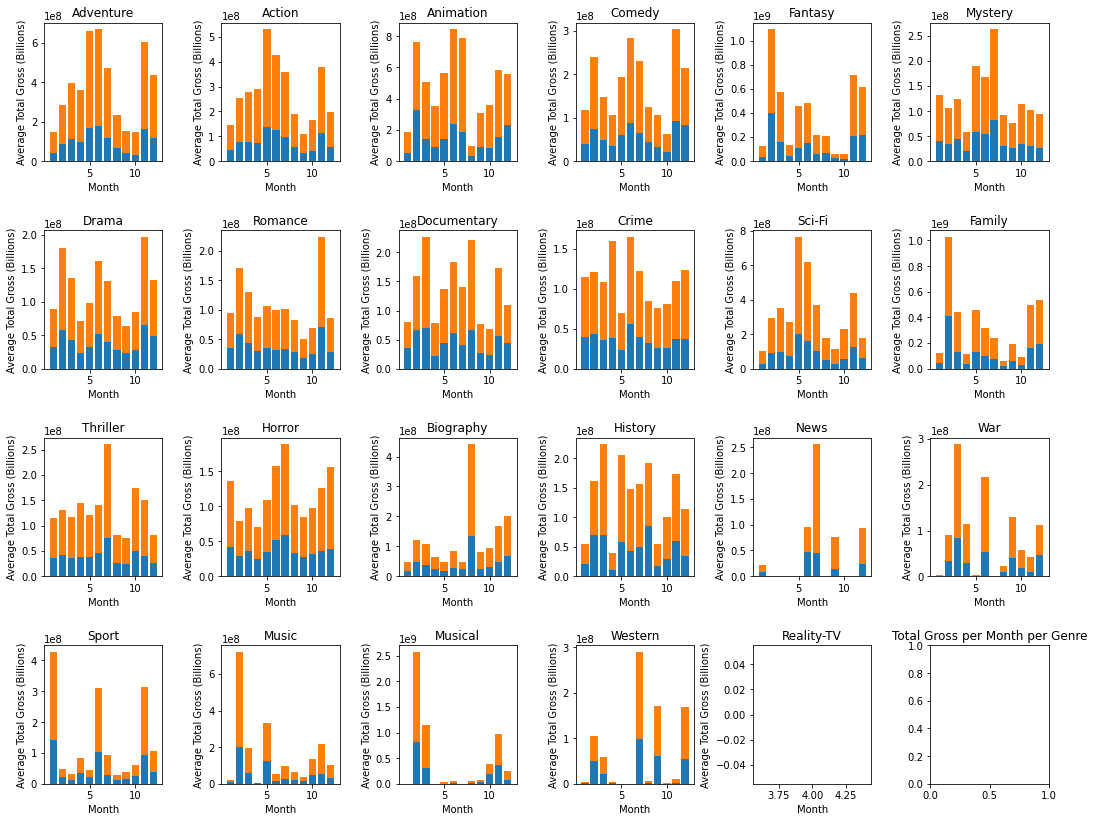

In [763]:
fig, ax = plt.subplots(nrows=figgy[0], ncols=figgy[1], figsize=(18,14))
###############
mean_dom_grosses = [genre_dict['Adventure'][genre_dict['Adventure']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses = [genre_dict['Adventure'][genre_dict['Adventure']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax[0][0].bar(months, mean_dom_grosses)   
ad2 = ax[0][0].bar(months, mean_ww_grosses, bottom=mean_dom_grosses) # use bottom parameter to make stacked
ax[0][0].set_title('Adventure')
ax[0][0].set_xlabel('Month')
ax[0][0].set_ylabel('Average Total Gross (Billions)')
###############


mean_dom_grosses1 = [genre_dict['Action'][genre_dict['Action']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses1 = [genre_dict['Action'][genre_dict['Action']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax[0][1].bar(months, mean_dom_grosses1)   
ad2 = ax[0][1].bar(months, mean_ww_grosses1, bottom=mean_dom_grosses1) # use bottom parameter to make stacked
ax[0][1].set_title('Action')
ax[0][1].set_xlabel('Month')
ax[0][1].set_ylabel('Average Total Gross (Billions)')
###############

mean_dom_grosses2 = [genre_dict['Animation'][genre_dict['Animation']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses2 = [genre_dict['Animation'][genre_dict['Animation']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax[0][2].bar(months, mean_dom_grosses2)   
ad2 = ax[0][2].bar(months, mean_ww_grosses2, bottom=mean_dom_grosses2) # use bottom parameter to make stacked
ax[0][2].set_title('Animation')
ax[0][2].set_xlabel('Month')
ax[0][2].set_ylabel('Average Total Gross (Billions)')
###############

mean_dom_grosses3 = [genre_dict['Comedy'][genre_dict['Comedy']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses3 = [genre_dict['Comedy'][genre_dict['Comedy']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax[0][3].bar(months, mean_dom_grosses3)   
ad2 = ax[0][3].bar(months, mean_ww_grosses3, bottom=mean_dom_grosses3) # use bottom parameter to make stacked
ax[0][3].set_title('Comedy')
ax[0][3].set_xlabel('Month')
ax[0][3].set_ylabel('Average Total Gross (Billions)')
###############

mean_dom_grosses4 = [genre_dict['Fantasy'][genre_dict['Fantasy']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses4 = [genre_dict['Fantasy'][genre_dict['Fantasy']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax[0][4].bar(months, mean_dom_grosses4)   
ad2 = ax[0][4].bar(months, mean_ww_grosses4, bottom=mean_dom_grosses4) # use bottom parameter to make stacked
ax[0][4].set_title('Fantasy')
ax[0][4].set_xlabel('Month')
ax[0][4].set_ylabel('Average Total Gross (Billions)')
###############

mean_dom_grosses5 = [genre_dict['Mystery'][genre_dict['Mystery']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses5 = [genre_dict['Mystery'][genre_dict['Mystery']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax[0][5].bar(months, mean_dom_grosses5)   
ad2 = ax[0][5].bar(months, mean_ww_grosses5, bottom=mean_dom_grosses5) # use bottom parameter to make stacked
ax[0][5].set_title('Mystery')
ax[0][5].set_xlabel('Month')
ax[0][5].set_ylabel('Average Total Gross (Billions)')
###############

mean_dom_grosses6 = [genre_dict['Drama'][genre_dict['Drama']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses6 = [genre_dict['Drama'][genre_dict['Drama']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax[1][0].bar(months, mean_dom_grosses6)   
ad2 = ax[1][0].bar(months, mean_ww_grosses6, bottom=mean_dom_grosses6) # use bottom parameter to make stacked
ax[1][0].set_title('Drama')
ax[1][0].set_xlabel('Month')
ax[1][0].set_ylabel('Average Total Gross (Billions)')
###############

mean_dom_grosses7 = [genre_dict['Romance'][genre_dict['Romance']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses7 = [genre_dict['Romance'][genre_dict['Romance']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax[1][1].bar(months, mean_dom_grosses7)   
ad2 = ax[1][1].bar(months, mean_ww_grosses7, bottom=mean_dom_grosses7) # use bottom parameter to make stacked
ax[1][1].set_title('Romance')
ax[1][1].set_xlabel('Month')
ax[1][1].set_ylabel('Average Total Gross (Billions)')
###############

mean_dom_grosses8 = [genre_dict['Documentary'][genre_dict['Documentary']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses8 = [genre_dict['Documentary'][genre_dict['Documentary']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax[1][2].bar(months, mean_dom_grosses8)   
ad2 = ax[1][2].bar(months, mean_ww_grosses8, bottom=mean_dom_grosses8) # use bottom parameter to make stacked
ax[1][2].set_title('Documentary')
ax[1][2].set_xlabel('Month')
ax[1][2].set_ylabel('Average Total Gross (Billions)')
###############

mean_dom_grosses9 = [genre_dict['Crime'][genre_dict['Crime']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses9 = [genre_dict['Crime'][genre_dict['Crime']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax[1][3].bar(months, mean_dom_grosses9)   
ad2 = ax[1][3].bar(months, mean_ww_grosses9, bottom=mean_dom_grosses9) # use bottom parameter to make stacked
ax[1][3].set_title('Crime')
ax[1][3].set_xlabel('Month')
ax[1][3].set_ylabel('Average Total Gross (Billions)')
###############

mean_dom_grosses10 = [genre_dict['Sci-Fi'][genre_dict['Sci-Fi']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses10 = [genre_dict['Sci-Fi'][genre_dict['Sci-Fi']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax[1][4].bar(months, mean_dom_grosses10)   
ad2 = ax[1][4].bar(months, mean_ww_grosses10, bottom=mean_dom_grosses10) # use bottom parameter to make stacked
ax[1][4].set_title('Sci-Fi')
ax[1][4].set_xlabel('Month')
ax[1][4].set_ylabel('Average Total Gross (Billions)')
###############

mean_dom_grosses11 = [genre_dict['Family'][genre_dict['Family']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses11 = [genre_dict['Family'][genre_dict['Family']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax[1][5].bar(months, mean_dom_grosses11)   
ad2 = ax[1][5].bar(months, mean_ww_grosses11, bottom=mean_dom_grosses11) # use bottom parameter to make stacked
ax[1][5].set_title('Family')
ax[1][5].set_xlabel('Month')
ax[1][5].set_ylabel('Average Total Gross (Billions)')
###############

mean_dom_grosses12 = [genre_dict['Thriller'][genre_dict['Thriller']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses12 = [genre_dict['Thriller'][genre_dict['Thriller']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax[2][0].bar(months, mean_dom_grosses12)   
ad2 = ax[2][0].bar(months, mean_ww_grosses12, bottom=mean_dom_grosses12) # use bottom parameter to make stacked
ax[2][0].set_title('Thriller')
ax[2][0].set_xlabel('Month')
ax[2][0].set_ylabel('Average Total Gross (Billions)')
###############

mean_dom_grosses13 = [genre_dict['Horror'][genre_dict['Horror']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses13 = [genre_dict['Horror'][genre_dict['Horror']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax[2][1].bar(months, mean_dom_grosses13)   
ad2 = ax[2][1].bar(months, mean_ww_grosses13, bottom=mean_dom_grosses13) # use bottom parameter to make stacked
ax[2][1].set_title('Horror')
ax[2][1].set_xlabel('Month')
ax[2][1].set_ylabel('Average Total Gross (Billions)')
###############

mean_dom_grosses14 = [genre_dict['Biography'][genre_dict['Biography']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses14 = [genre_dict['Biography'][genre_dict['Biography']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax[2][2].bar(months, mean_dom_grosses14)   
ad2 = ax[2][2].bar(months, mean_ww_grosses14, bottom=mean_dom_grosses14) # use bottom parameter to make stacked
ax[2][2].set_title('Biography')
ax[2][2].set_xlabel('Month')
ax[2][2].set_ylabel('Average Total Gross (Billions)')
###############

mean_dom_grosses15 = [genre_dict['History'][genre_dict['History']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses15 = [genre_dict['History'][genre_dict['History']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax[2][3].bar(months, mean_dom_grosses15)   
ad2 = ax[2][3].bar(months, mean_ww_grosses15, bottom=mean_dom_grosses15) # use bottom parameter to make stacked
ax[2][3].set_title('History')
ax[2][3].set_xlabel('Month')
ax[2][3].set_ylabel('Average Total Gross (Billions)')
###############

mean_dom_grosses16 = [genre_dict['News'][genre_dict['News']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses16 = [genre_dict['News'][genre_dict['News']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax[2][4].bar(months, mean_dom_grosses16)   
ad2 = ax[2][4].bar(months, mean_ww_grosses16, bottom=mean_dom_grosses16) # use bottom parameter to make stacked
ax[2][4].set_title('News')
ax[2][4].set_xlabel('Month')
ax[2][4].set_ylabel('Average Total Gross (Billions)')
###############

mean_dom_grosses17 = [genre_dict['War'][genre_dict['War']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses17 = [genre_dict['War'][genre_dict['War']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax[2][5].bar(months, mean_dom_grosses17)   
ad2 = ax[2][5].bar(months, mean_ww_grosses17, bottom=mean_dom_grosses17) # use bottom parameter to make stacked
ax[2][5].set_title('War')
ax[2][5].set_xlabel('Month')
ax[2][5].set_ylabel('Average Total Gross (Billions)')
###############

mean_dom_grosses18 = [genre_dict['Sport'][genre_dict['Sport']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses18 = [genre_dict['Sport'][genre_dict['Sport']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax[3][0].bar(months, mean_dom_grosses18)   
ad2 = ax[3][0].bar(months, mean_ww_grosses18, bottom=mean_dom_grosses18) # use bottom parameter to make stacked
ax[3][0].set_title('Sport')
ax[3][0].set_xlabel('Month')
ax[3][0].set_ylabel('Average Total Gross (Billions)')
###############

mean_dom_grosses19 = [genre_dict['Music'][genre_dict['Music']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses19 = [genre_dict['Music'][genre_dict['Music']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax[3][1].bar(months, mean_dom_grosses19)   
ad2 = ax[3][1].bar(months, mean_ww_grosses19, bottom=mean_dom_grosses19) # use bottom parameter to make stacked
ax[3][1].set_title('Music')
ax[3][1].set_xlabel('Month')
ax[3][1].set_ylabel('Average Total Gross (Billions)')
###############

mean_dom_grosses20 = [genre_dict['Musical'][genre_dict['Musical']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses20 = [genre_dict['Musical'][genre_dict['Musical']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax[3][2].bar(months, mean_dom_grosses20)   
ad2 = ax[3][2].bar(months, mean_ww_grosses20, bottom=mean_dom_grosses20) # use bottom parameter to make stacked
ax[3][2].set_title('Musical')
ax[3][2].set_xlabel('Month')
ax[3][2].set_ylabel('Average Total Gross (Billions)')
###############

mean_dom_grosses21 = [genre_dict['Western'][genre_dict['Western']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses21 = [genre_dict['Western'][genre_dict['Western']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax[3][3].bar(months, mean_dom_grosses21)   
ad2 = ax[3][3].bar(months, mean_ww_grosses21, bottom=mean_dom_grosses21) # use bottom parameter to make stacked
ax[3][3].set_title('Western')
ax[3][3].set_xlabel('Month')
ax[3][3].set_ylabel('Average Total Gross (Billions)')
###############

mean_dom_grosses22 = [genre_dict['Reality-TV'][genre_dict['Reality-TV']['month_released']==i]['domestic_adj'].mean()
                   for i in months]

mean_ww_grosses22 = [genre_dict['Reality-TV'][genre_dict['Reality-TV']['month_released']==i]['worldwide_adj'].mean()
                   for i in months]

# x and y vals
ad1 = ax[3][4].bar(months, mean_dom_grosses22)   
ad2 = ax[3][4].bar(months, mean_ww_grosses22, bottom=mean_dom_grosses22) # use bottom parameter to make stacked
ax[3][4].set_title('Reality-TV')
ax[3][4].set_xlabel('Month')
ax[3][4].set_ylabel('Average Total Gross (Billions)')
###############

fig.subplots_adjust(wspace=.5, hspace=.5)

plt.title('Total Gross per Month per Genre')


In [ ]:
# x and y vals
ad1 = ax[0][0].bar(months, mean_dom_grosses)   
ad2 = ax[0][0].bar(months, mean_ww_grosses, bottom=mean_dom_grosses) # use bottom parameter to make stacked
ax[0][0].set_title('Average Total Gross per Month')
ax[0][0].set_xlabel('Month')
ax[0][0].set_ylabel('Average Total Gross (Billions)')

ax2.legend((ad1[0], ad2[0]), ('Domestic Gross', 'Worldwide Gross'))

ax[0][0] = None 
ax[0][1] = None
ax[0][2] = None
ax[0][3] = None
ax[0][4] = None
ax[0][5] = None

# for graphing subplots:

In [757]:
def ax_factory(amount, nrows=1, ncols=1, sharex=False, sharey=False):
    fig, ax = plt.subplots()
    

Text(0, 0.5, 'Average Domestic Gross (Billions?)')

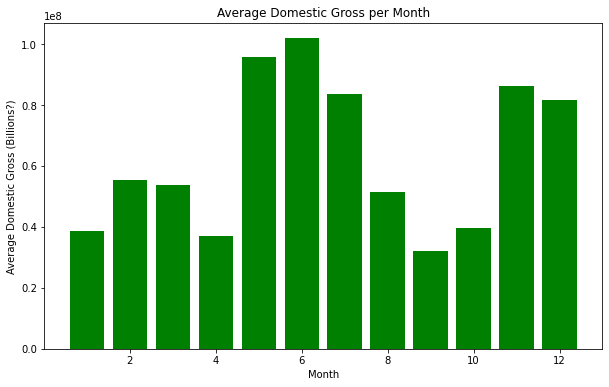

In [203]:
# comparing month released to mean DOMESTIC gross (using domestic_adj)
month_avg, ax = plt.subplots(figsize=(10,6))
months = [sorted(tnMovieBudgets['month_released'].value_counts().index)[i] 
     for i in range(0, len(tnMovieBudgets['month_released'].value_counts().index))]
mean_dom_grosses = [tnMovieBudgets[tnMovieBudgets['month_released']==i]['domestic_adj'].mean() for i in range(1,13)]                                                                                               
ax.bar(x, mean_dom_grosses, color='green')   
ax.set_title('Average Domestic Gross per Month')
ax.set_xlabel('Month')
ax.set_ylabel('Average Domestic Gross (Billions?)')

In [88]:
# comparing mean gross without zeros
tnMovies_noz = tnMovieBudgets.replace(0, np.NaN)
tnMovies_noz

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,month_released,year_released
0,1,2009-12-18,Avatar,425000000,760507625.0,2.776345e+09,12,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875.0,1.045664e+09,5,2011
2,3,2019-06-07,Dark Phoenix,350000000,42762350.0,1.497624e+08,6,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868.0,1.403014e+09,5,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382.0,1.316722e+09,12,2017
...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,NaN,NaN,12,2018
5778,79,1999-04-02,Following,6000,48482.0,2.404950e+05,4,1999
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338.0,1.338000e+03,7,2005
5780,81,2015-09-29,A Plague So Pleasant,1400,NaN,NaN,9,2015


In [205]:
# month_avg, ax = plt.subplots(figsize=(10,6))
months = [sorted(tnMovies_noz['month_released'].value_counts().index)[i] 
     for i in range(0, len(tnMovies_noz['month_released'].value_counts().index))]
#mean_dom_grosses1 = [tnMovies_noz[tnMovies_noz['month_released']==i]['domestic_adj'].mean(skipna=True) for i in range(1,13)]                                                                                               
#ax.bar(x, mean_dom_grosses1, color='indigo')   
#ax.set_title('Average Domestic Gross per Month, without outliers')
#ax.set_xlabel('Month')
#ax.set_ylabel('Average Domestic Gross (Hundred Millions)')

# ***this graph of means have the same values as the other, but why?***
# may want to convert months to their names

Text(0, 0.5, 'Average Worldwide Gross (Billions)')

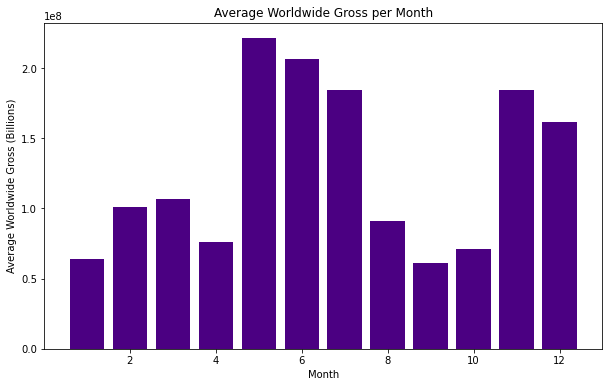

In [208]:
# comparing month released to mean WORLDWIDE gross
month_avg, ax = plt.subplots(figsize=(10,6))
months = [sorted(tnMovieBudgets['month_released'].value_counts().index)[i] 
     for i in range(0, len(tnMovieBudgets['month_released'].value_counts().index))]
mean_ww_grosses = [tnMovieBudgets[tnMovieBudgets['month_released']==i]['worldwide_adj'].mean() for i in range(1,13)]                                                                                               
ax.bar(months, mean_ww_grosses, color='indigo')   
ax.set_title('Average Worldwide Gross per Month')
ax.set_xlabel('Month')
ax.set_ylabel('Average Worldwide Gross (Billions)')

# change y labels to be clearer

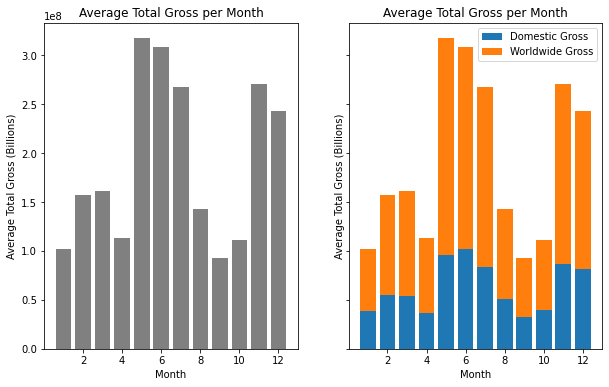

In [367]:
# comparing month released to mean WORLDWIDE + DOMESTIC, 2 plots

# create new column 'total gross'
tnMovieBudgets['total_gross'] = tnMovieBudgets['worldwide_adj'] + tnMovieBudgets['domestic_adj']

month_avg, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(10,6))

# x and y values
months = [sorted(tnMovieBudgets['month_released'].value_counts().index)[i] 
     for i in range(0, len(tnMovieBudgets['month_released'].value_counts().index))]
mean_total_grosses = [tnMovieBudgets[tnMovieBudgets['month_released']==i]['total_gross'].mean() for i in range(1,13)]

# setting up the graph 1
ax1.bar(months, mean_total_grosses, color='grey')   
ax1.set_title('Average Total Gross per Month')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Total Gross (Billions)')

# setting up graph 2
p1 = ax2.bar(months, mean_dom_grosses)   
p2 = ax2.bar(months, mean_ww_grosses, bottom=mean_dom_grosses) # use bottom parameter to make stacked
ax2.set_title('Average Total Gross per Month')
ax2.set_xlabel('Month')
ax2.set_ylabel('Average Total Gross (Billions)')

ax2.legend((p1[0], p2[0]), ('Domestic Gross', 'Worldwide Gross'))

plt.show()

# may want to relabel xticks

In [ ]:
# comparing month released to mean gross per genre

month_avg, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(10,6))

# x and y values (months is already provided in previous cells)
genres = [sorted(tnMovieBudgets['month_released'].value_counts().index)[i] 
     for i in range(0, len(tnMovieBudgets['month_released'].value_counts().index))]
mean_total_grosses = [tnMovieBudgets[tnMovieBudgets['month_released']==i]['total_gross'].mean() for i in range(1,13)]

# setting up the graph 1
ax1.bar(months, mean_total_grosses, color='grey')   
ax1.set_title('Average Total Gross per Month')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Total Gross (Billions)')

# setting up graph 2
p1 = ax2.bar(months, mean_dom_grosses)   
p2 = ax2.bar(months, mean_ww_grosses, bottom=mean_dom_grosses) # use bottom parameter to make stacked
ax2.set_title('Average Total Gross per Month')
ax2.set_xlabel('Month')
ax2.set_ylabel('Average Total Gross (Billions)')

ax2.legend((p1[0], p2[0]), ('Domestic Gross', 'Worldwide Gross'))

plt.show()


In [93]:
# comparing budget and net gross

Text(0, 0.5, 'Average Domestic Gross (Hundred Millions)')

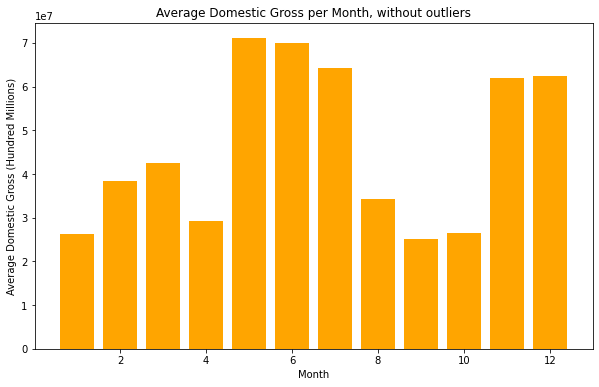

In [94]:
# stacked bar plot with month released domestic and foreign gross


month_avg, ax = plt.subplots(figsize=(10,6))
x = [sorted(tnMovies_noz['month_released'].value_counts().index)[i] 
     for i in range(0, len(tnMovies_noz['month_released'].value_counts().index))]
mean_dom_grosses1 = [tnMovies_noz[tnMovies_noz['month_released']==i]['domestic_gross'].mean(skipna=True) for i in range(1,13)]                                                                                               
ax.bar(x, mean_dom_grosses1, color='orange')   
ax.set_title('Average Domestic Gross per Month, without outliers')
ax.set_xlabel('Month')
ax.set_ylabel('Average Domestic Gross (Hundred Millions)')

In [101]:
genre_dict_2['Adventure'].columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'title_equal', 'ordering_akas', 'title',
       'region', 'language', 'types', 'attributes', 'is_original_title',
       'directors', 'writers', 'ordering_princ', 'nconst', 'category', 'job',
       'characters', 'averagerating', 'numvotes', 'genre_ids', 'id',
       'popularity', 'release_date', 'vote_average', 'vote_count', 'studio',
       'domestic_gross', 'foreign_gross', 'year_x', 'domestic_adj_x',
       'foreign_adj', 'month_released', 'year_y', 'domestic_adj_y',
       'worldwide_adj', 'budget_adj'],
      dtype='object')

<ipython-input-107-4e3a0772d768>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(top_genre_ct_names, rotation = 45)


NameError: name 'top_genre_ct_name' is not defined

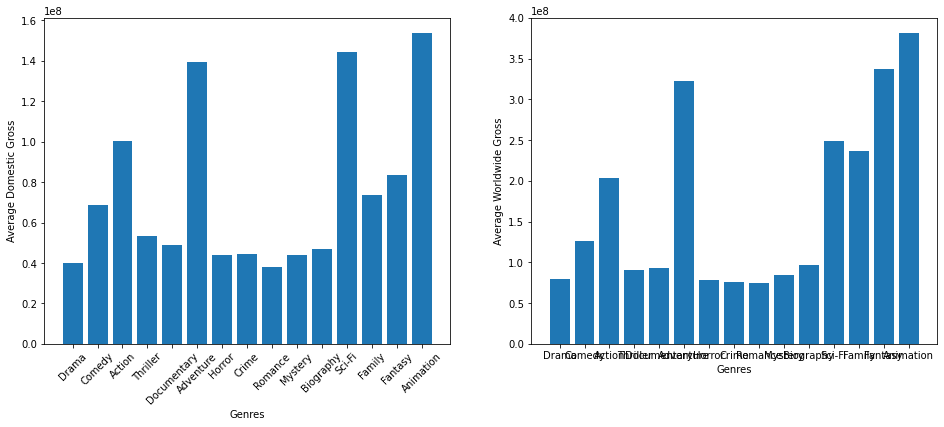

In [107]:
# Measure the highest differences between worldwide and domestic gross (international appeal)
# top 15 genres average worldwide gross
popular_genres, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
###############

domestic_avgs = [genre_dict_2[i]['domestic_adj_x'][genre_dict_2[i]['domestic_adj_x']!='Unknown'].mean() 
                 for i in top_genre_ct_names]
ww_avgs = [genre_dict_2[i]['worldwide_adj'].mean() for i in top_genre_ct_names]

ax1.bar(top_genre_ct_names, domestic_avgs)
ax2.bar(top_genre_ct_names, ww_avgs)
# x and y vals; use bottom parameter to make stacked
ax2.set_xlabel('Genres')
ax2.set_ylabel('Average Worldwide Gross')
ax1.set_xlabel('Genres')
ax1.set_ylabel('Average Domestic Gross')

ax1.set_xticklabels(top_genre_ct_names, rotation = 45)
ax2.set_xticklabels(top_genre_ct_name, rotation = 45)

ax1.set_title('Top 15 Genres Average Domestic Gross')
ax2.set_title('Top 15 Genres Average Worldwide Gross ')

# notice that Western worldwide gross is less

<ipython-input-106-8c6641fff2bc>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(most_popular_names, rotation = 45)
<ipython-input-106-8c6641fff2bc>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(most_popular_names, rotation = 45)


Text(0.5, 1.0, 'Top 15 Genres Average Worldwide Gross ')

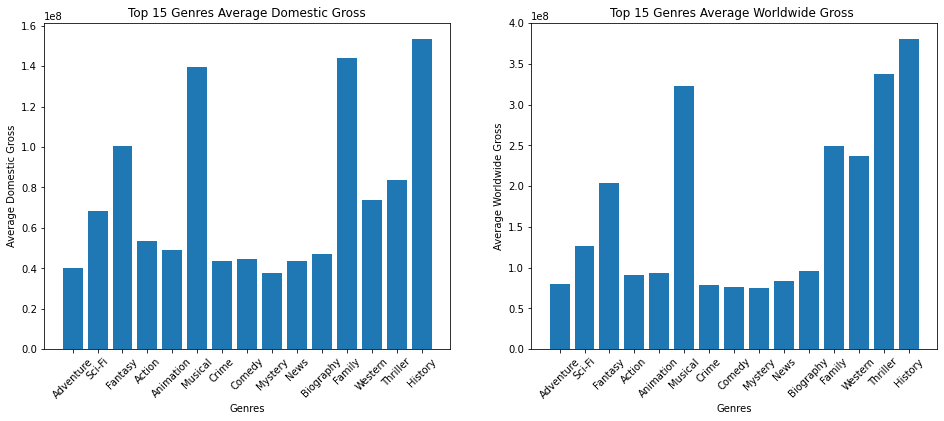

In [106]:
popular_genres, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
###############

domestic_avgs = [genre_dict_2[i]['domestic_adj_x'][genre_dict_2[i]['domestic_adj_x']!='Unknown'].mean() 
                 for i in top_genre_ct_names]
ww_avgs = [genre_dict_2[i]['worldwide_adj'].mean() for i in top_genre_ct_names]

ax1.bar(most_popular_names, domestic_avgs)
ax2.bar(most_popular_names, ww_avgs)
# x and y vals; use bottom parameter to make stacked
ax2.set_xlabel('Genres')
ax2.set_ylabel('Average Worldwide Gross')
ax1.set_xlabel('Genres')
ax1.set_ylabel('Average Domestic Gross')

ax1.set_xticklabels(most_popular_names, rotation = 45)
ax2.set_xticklabels(most_popular_names, rotation = 45)

ax1.set_title('Top 15 Genres Average Domestic Gross')
ax2.set_title('Top 15 Genres Average Worldwide Gross ')

In [110]:
imdb_BOM_tn['studio'][imdb_BOM_tn['studio']!='Unknown'].value_counts().sum()

1681

In [113]:
imdb_BOM_tn['studio'][imdb_BOM_tn['studio']!='Unknown'].head()

4    IFC
5    IFC
6    IFC
7    IFC
8    IFC
Name: studio, dtype: object

In [114]:
# List of studios
studio_list = []
for studio in imdb_BOM_tn['studio'][imdb_BOM_tn['studio']!='Unknown']:
    if studio not in studio_list:
        studio_list.append(studio)
                
studio_list


['IFC',
 'Fox',
 'Uni.',
 'FD',
 'BV',
 'P/DW',
 'LGF',
 'Wein.',
 'RTWC',
 'WB',
 'Over.',
 'Sony',
 'Par.',
 'W/Dim.',
 'FoxS',
 'A24',
 'CBS',
 'Rela.',
 'WB (NL)',
 'Sum.',
 'Osci.',
 'Focus',
 'SGem',
 'EOne',
 'SMod',
 'SPC',
 'LG/S',
 'Mira.',
 'RAtt.',
 'ORF',
 'OMNI/FSR',
 'App.',
 'Magn.',
 'Amazon',
 'FCW',
 'DR',
 'Free',
 'BG',
 'STX',
 'Gold.',
 'ATO',
 'Relbig.',
 'BST',
 'Anch.',
 'MGM',
 'TriS',
 'UTV',
 'Drft.',
 'MNE',
 'WHE',
 'KE',
 'Viv.',
 'Jan.',
 '3D',
 'MBox',
 'Eros',
 'ParV',
 'ALP',
 'VE',
 'P4',
 'LD',
 'Yash',
 'BH Tilt',
 'IM',
 'Studio 8',
 'PH',
 'TFA',
 'ENTMP',
 'Alc',
 'Strand',
 'Saban',
 'CE',
 'Trib.',
 'EC',
 'BSC',
 'Cohen',
 'ELS',
 'PNT',
 'Annapurna',
 'LGP',
 'Cleopatra',
 'PFR',
 'BBC',
 'Affirm',
 'Orch.',
 'GrtIndia',
 'RLJ',
 'Neon',
 'Global Road',
 'NM',
 'IW',
 'Scre.',
 'Kino',
 'First',
 'GK',
 'NFC',
 'Mont.',
 'IVP',
 'CJ']

In [118]:
imdb_BOM_tn['total_BOM_gross'] = imdb_BOM_tn['domestic_adj_y'][imdb_BOM_tn['domestic_adj_y']!='Unknown'] + imdb_BOM_tn['foreign_adj'][imdb_BOM_tn['foreign_adj']!='Unknown']





In [122]:
imdb_BOM_tn['total_BOM_gross'].fillna(value='Unknown', inplace=True)

In [125]:
imdb_BOM_tn['total_BOM_gross'][imdb_BOM_tn['total_BOM_gross']!='Unknown'].value_counts().sum()

1682

In [ ]:
# Differences in STUDIO mean gross per year

studio_grosses, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
###############

years = [genre_dict_2[i]['domestic_adj_y'].mean() for i in top_genre_ct_names]
avg_gross = [genre_dict_2[i]['worldwide_adj'].mean() for i in top_genre_ct_names]

ax.bar(top_genre_ct_names, domestic_avgs)

# x and y vals; use bottom parameter to make stacked
ax.set_xlabel('Studio Abbr')
ax.set_ylabel('Average')

ax.set_xticklabels(years, rotation = 45)

ax.set_title('Top 15 Genres Average Domestic Gross')

In [132]:
studios_dict = {studio_list[i]:imdb_BOM_tn['total_BOM_gross'][imdb_BOM_tn['studio']==studio_list[i]].mean() for i in range(0, len(studio_list))}
sorted_top_15_genres = sorted(studios_dict.items(), key=lambda kv: kv[1], reverse=True)[:15]

top_15_studio_names = [sorted_top_15_genres[i][0] for i in range(0, len(sorted_top_15_genres))]
top_15_studio_avgs = [sorted_top_15_genres[i][1] for i in range(0, len(sorted_top_15_genres))]


<ipython-input-137-8cc3e5746fe9>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_15_studio_names, rotation = 45)


Text(0.5, 1.0, 'Top 15 Studios by Avg Total Gross')

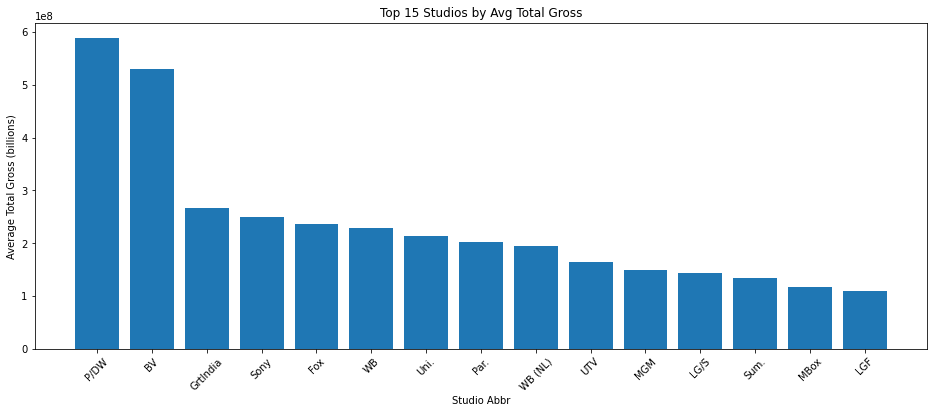

In [137]:
# Studio average total Gross

studio_grosses, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
###############

top_studios = top_15_studio_names
studio_avgs = top_15_studio_avgs

ax.bar(top_studios, studio_avgs)

# x and y vals; use bottom parameter to make stacked
ax.set_xlabel('Studio Abbr')
ax.set_ylabel('Average Total Gross (billions)')

ax.set_xticklabels(top_15_studio_names, rotation = 45)

ax.set_title('Top 15 Studios by Avg Total Gross')

# P/DW == Pixar and Dreamworks
# 

In [139]:
imdb_BOM_tn[imdb_BOM_tn['studio']=='BV']

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title_equal,ordering_akas,title,region,...,foreign_gross,year_x,domestic_adj_x,foreign_adj,month_released,year_y,domestic_adj_y,worldwide_adj,budget_adj,total_BOM_gross
17,tt0398286,Tangled,Tangled,2010,100,"[Adventure, Animation, Comedy]",True,10,Raiponce,FR,...,3.91e+08,2010,2.3833e+08,4.64078e+08,11,2010,2.383559e+08,6.960907e+08,3.085944e+08,7.02434e+08
18,tt0401729,John Carter,John Carter,2012,132,"[Action, Adventure, Sci-Fi]",True,10,Джон Картер: Мiж двох свiтiв,UA,...,2.111e+08,2012,8.24023e+07,2.37964e+08,3,2012,8.235577e+07,3.187630e+08,3.099951e+08,3.20319e+08
23,tt0433035,Real Steel,Real Steel,2011,127,"[Action, Drama, Family]",True,10,Čelična borba,RS,...,2.138e+08,2011,9.83749e+07,2.45995e+08,10,2011,9.833263e+07,3.036162e+08,1.265641e+08,3.44327e+08
25,tt0435761,Toy Story 3,Toy Story 3,2010,103,"[Adventure, Animation, Comedy]",True,10,Η ιστορία των παιχνιδιών 3,GR,...,6.52e+08,2010,4.92564e+08,7.7386e+08,6,2010,4.925699e+08,1.268655e+09,2.373803e+08,1.26643e+09
27,tt0443272,Lincoln,Lincoln,2012,150,"[Biography, Drama, History]",True,10,Lincoln,HR,...,9.31e+07,2012,2.05386e+08,1.04947e+08,11,2012,2.053949e+08,3.081310e+08,7.327158e+07,3.10342e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3515,tt5028340,Mary Poppins Returns,Mary Poppins Returns,2018,130,"[Comedy, Family, Fantasy]",True,10,Mary Poppins se vraća,HR,...,1.776e+08,2018,1.77277e+08,1.83049e+08,12,2018,1.772341e+08,3.520067e+08,1.339884e+08,3.60283e+08
3524,tt5095030,Ant-Man and the Wasp,Ant-Man and the Wasp,2018,118,"[Action, Adventure, Comedy]",True,10,Skruzdeliukas ir vapsva,LT,...,4.06e+08,2018,2.23245e+08,4.18456e+08,7,2018,2.232956e+08,6.422628e+08,1.339884e+08,6.41752e+08
3568,tt5523010,The Nutcracker and the Four Realms,The Nutcracker and the Four Realms,2018,99,"[Adventure, Family, Fantasy]",True,10,El cascanueces y los cuatro reinos,UY,...,1.191e+08,2018,5.65843e+07,1.22754e+08,11,2018,5.654193e+07,1.755185e+08,1.369774e+08,1.79296e+08
3818,Unknown,Oceans,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,6.32e+07,2010,2.30259e+07,7.50122e+07,4,2010,2.305238e+07,1.030083e+08,9.495212e+07,9.80646e+07


In [ ]:
# Studio average Domestic Gross

In [ ]:
# Studio average FOREIGN Gross (use BOM)

In [ ]:
# Top 5 Genres per year
top_5_genres = top

In [ ]:
# percent of subscribers that watch new content provided by a streaming service

In [ ]:
# comparing streaming services with multiple figs